In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../Data/Speed Dating Data.csv', encoding = "ISO-8859-1", engine='python')
pd.set_option("display.max_columns", None)
data

,iid,id,gender,idg,condtn,wave,Number of people met,station met,start station,order,partner,pid,match,interest level,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,Unnamed: 195
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.

In [3]:
females_ = data[data['gender'] == 0]

# Most desired attributes in a partner by Ethnicity, Gender, and Age Group:
## Females:

In [5]:
def age_ethnicity(data):
    copy_data = data.copy()
    bins = [18,30,40,50,60,70,100]
    labels = ['18-29','30-39', '40-49', '50-59', '60-69', '70+']
    copy_data['agerange'] = pd.cut(copy_data.age, bins, labels = labels,include_lowest = True)
    rm_dupes = copy_data.drop_duplicates('iid').groupby(['race','agerange'])['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg('mean').dropna()
    ethnicity = rm_dupes.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
    return ethnicity

a_e_f = age_ethnicity(females_)
a_e_f

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


attr1_1    sinc1_1  \
race                                  agerange                         
Black/African American                18-29     20.002308  15.791538   
                                      30-39     16.526667  17.223333   
European/Caucasian-American           18-29     18.269274  17.409194   
                                      30-39     14.406875  19.000625   
Latino/Hispanic American              18-29     18.270909  17.767727   
                                      30-39     26.666667  25.666667   
Asian/Pacific Islander/Asian-American 18-29     17.654615  19.128923   
                                      30-39     14.444000  28.478000   
                                      50-59     25.000000   0.000000   
Other                                 18-29     18.682667  18.650625   

                                                 intel1_1     fun1_1  \
race                                  agerange                         
Black/African American                18-29     18.823846  17.676154   
                                      30-39     18.610000  17.916667   
European/Caucasian-American           18-29     21.211935  18.210645   
                                      30-39     21.813125  15.985000   
Latino/Hispanic American              18-29     22.119545  17.026818   
                                      30-39     25.000000   7.333333   
Asian/Pacific Islander/Asian-American 18-29     20.523385  16.688769   
                                      30-39     18.478000  13.078000   
                                      50-59     25.000000  25.000000   
Other                                 18-29     21.145625  16.518125   

                                                   amb1_1    shar1_1  
race                                  agerange                        
Black/African American                18-29     15.201538  12.505385  
                                      30-39     17.223333  12.500000  
European/Caucasian-American           18-29     13.125726  11.853952  
                                      30-39     13.706875  15.086875  
Latino/Hispanic American              18-29     12.926364  11.741905  
                                      30-39      8.666667   6.666667  
Asian/Pacific Islander/Asian-American 18-29     12.322615  13.682615  
                                      30-39     11.044000  14.478000  
                                      50-59      0.000000  25.000000  
Other                                 18-29     11.275625  13.958125

### Visualizations:

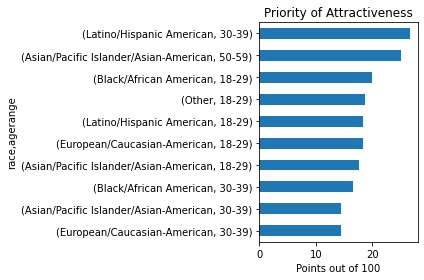

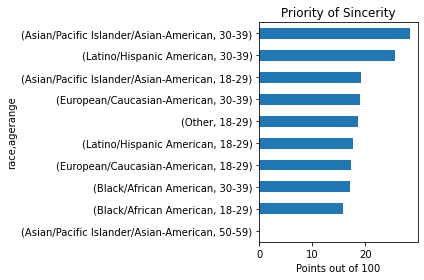

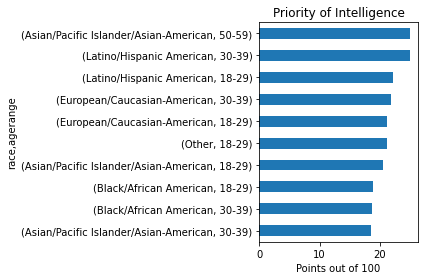

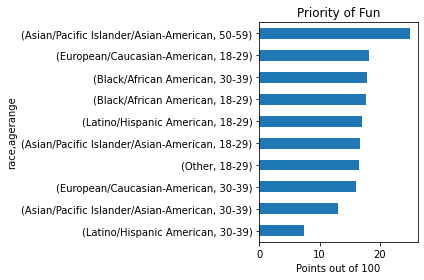

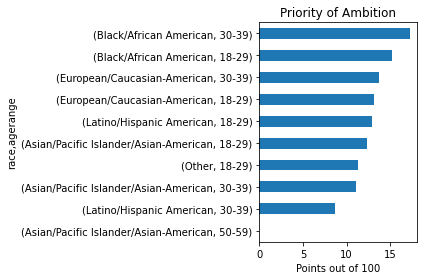

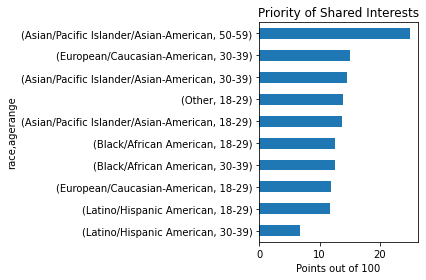

In [13]:
a_e_f.sort_values(['attr1_1'], ascending = True).plot(kind = 'barh', y = "attr1_1", stacked = True, title = "Priority of Attractiveness", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
#plt.savefig('f_attr1_1.png')
a_e_f.sort_values(['sinc1_1'], ascending = True).plot(kind = 'barh', y = "sinc1_1", stacked = True, title = "Priority of Sincerity", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
#plt.savefig('f_sinc1_1.png')
a_e_f.sort_values(['intel1_1'], ascending = True).plot(kind = 'barh', y = "intel1_1", stacked = True, title = "Priority of Intelligence", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
#plt.savefig('f_intel1_1.png')
a_e_f.sort_values(['fun1_1'], ascending = True).plot(kind = 'barh', y = "fun1_1", stacked = True, title = "Priority of Fun", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
#plt.savefig('f_fun1_1.png')
a_e_f.sort_values(['amb1_1'], ascending = True).plot(kind = 'barh', y = "amb1_1", stacked = True, title = "Priority of Ambition", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
#plt.savefig('f_amb1_1.png')
a_e_f.sort_values(['shar1_1'], ascending = True).plot(kind = 'barh', y = "shar1_1", stacked = True, title = "Priority of Shared Interests", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
#plt.savefig('f_shar1_1.png')

## Males:

In [14]:
males_ = data[data['gender'] == 1]
a_e_m = age_ethnicity(males_)
a_e_m

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


attr1_1    sinc1_1  \
race                                  agerange                         
Black/African American                18-29     25.700000  17.800000   
European/Caucasian-American           18-29     28.652378  15.221538   
                                      30-39     25.570000  13.981765   
                                      40-49     23.810000  23.810000   
Latino/Hispanic American              18-29     25.446250  16.841875   
                                      30-39     20.000000  20.000000   
Asian/Pacific Islander/Asian-American 18-29     26.221833  18.745424   
                                      30-39     19.550000  17.534000   
Other                                 18-29     26.554706  17.358235   
                                      30-39     20.250000  17.750000   

                                                 intel1_1     fun1_1  \
race                                  agerange                         
Black/African American                18-29     20.500000  17.000000   
European/Caucasian-American           18-29     19.959790  18.102797   
                                      30-39     21.922941  17.511176   
                                      40-49     23.810000  23.810000   
Latino/Hispanic American              18-29     20.352500  16.227500   
                                      30-39     20.000000  15.000000   
Asian/Pacific Islander/Asian-American 18-29     16.821833  16.297119   
                                      30-39     16.350000  16.966000   
Other                                 18-29     19.652353  19.672353   
                                      30-39     21.000000  17.250000   

                                                   amb1_1    shar1_1  
race                                  agerange                        
Black/African American                18-29      8.200000   9.900000  
European/Caucasian-American           18-29      8.148671  10.124825  
                                      30-39      8.909412  12.105882  
                                      40-49      2.380000   2.380000  
Latino/Hispanic American              18-29     11.010625  13.123125  
                                      30-39     10.000000  15.000000  
Asian/Pacific Islander/Asian-American 18-29      9.722034  12.784237  
                                      30-39     12.300000  17.300000  
Other                                 18-29      8.504118   7.670000  
                                      30-39     12.250000  11.500000

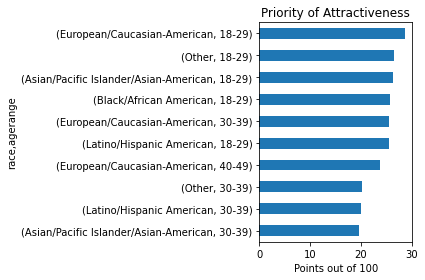

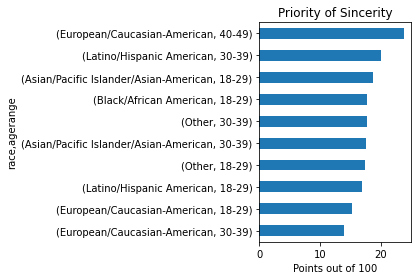

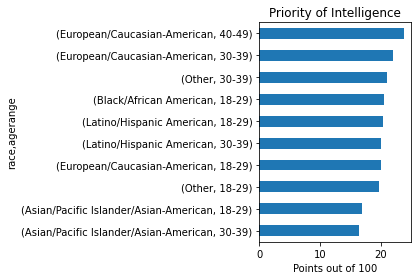

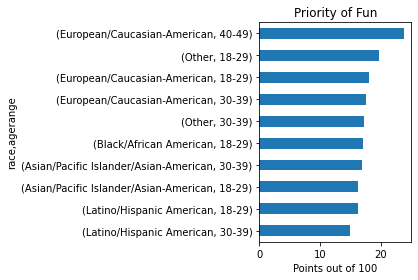

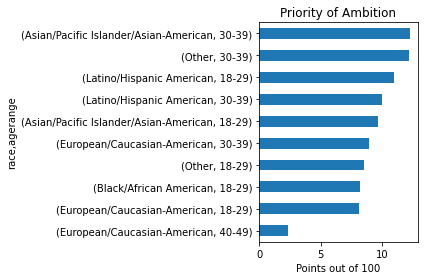

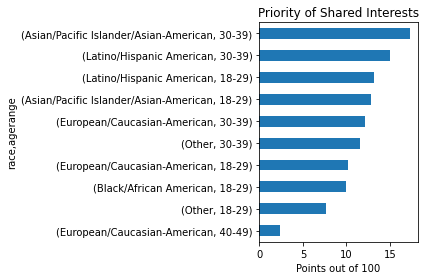

In [15]:
a_e_m.sort_values(['attr1_1'], ascending = True).plot(kind = 'barh', y = "attr1_1", stacked = True, title = "Priority of Attractiveness", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
plt.savefig('m_attr1_1.png')
a_e_m.sort_values(['sinc1_1'], ascending = True).plot(kind = 'barh', y = "sinc1_1", stacked = True, title = "Priority of Sincerity", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
plt.savefig('m_sinc1_1.png')
a_e_m.sort_values(['intel1_1'], ascending = True).plot(kind = 'barh', y = "intel1_1", stacked = True, title = "Priority of Intelligence", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
plt.savefig('m_intel1_1.png')
a_e_m.sort_values(['fun1_1'], ascending = True).plot(kind = 'barh', y = "fun1_1", stacked = True, title = "Priority of Fun", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
plt.savefig('m_fun1_1.png')
a_e_m.sort_values(['amb1_1'], ascending = True).plot(kind = 'barh', y = "amb1_1", stacked = True, title = "Priority of Ambition", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
plt.savefig('m_amb1_1.png')
a_e_m.sort_values(['shar1_1'], ascending = True).plot(kind = 'barh', y = "shar1_1", stacked = True, title = "Priority of Shared Interests", legend = None).set_xlabel('Points out of 100')
plt.tight_layout()
plt.savefig('m_shar_1.png')

In [46]:
wfm = females_.drop_duplicates('iid').groupby('race')['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg('mean')

wfm1 = wfm.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
wfm1

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
race,,,,,,
Black/African American,19.350625,16.060000,18.783750,17.721250,15.580625,12.504375
European/Caucasian-American,17.843262,17.608156,21.271560,17.970780,13.134043,12.243121
Latino/Hispanic American,19.278400,18.715600,22.465200,15.863600,12.415200,11.107500
Asian/Pacific Islander/Asian-American,17.531972,19.517887,20.442394,16.551549,12.059014,13.898028
Other,18.682667,18.650625,21.145625,16.518125,11.275625,13.958125


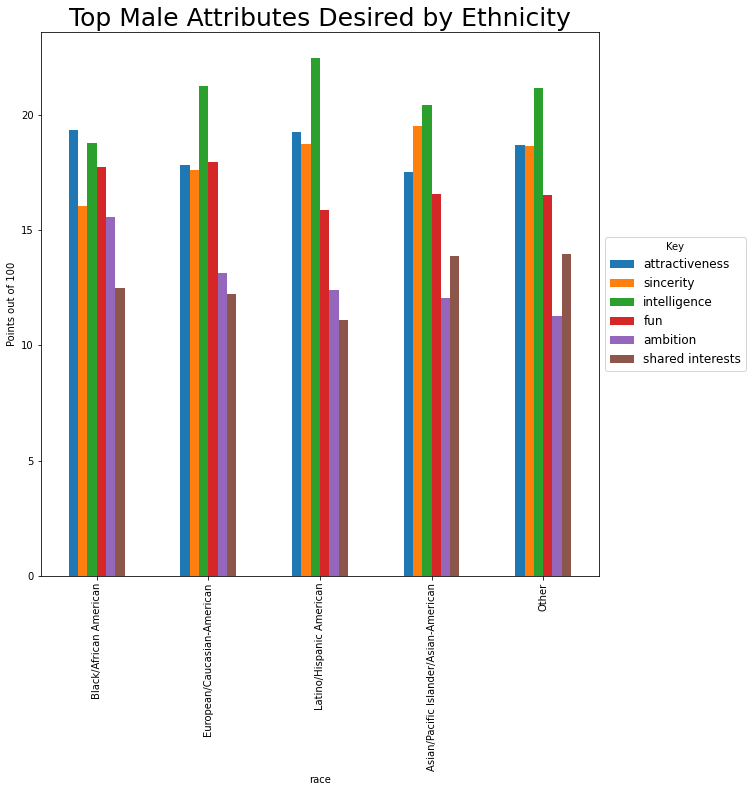

In [55]:
#stacking my dataframe nicely to give me just the mean of each attribute
idx = pd.IndexSlice
mean_w = wfm1
mean_w.stack()

#plot
w = mean_w.plot(kind='bar', figsize = (10,10))
w.set_title(label = 'Top Male Attributes Desired by Ethnicity',fontdict ={'fontsize':25})
w.set_ylabel('Points out of 100')
plt.legend(['attractiveness','sincerity','intelligence','fun','ambition','shared interests'],loc = 'center left', bbox_to_anchor=(1.0, 0.5), fontsize = 'large' , title = 'Key')

#plt.savefig('Desired Attributes for Women.png')
plt.show()

In [24]:
mean_w.stack()

,,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
race,,,,,,,
Black/African American,mean,19.350625,16.060000,18.783750,17.721250,15.580625,12.504375
European/Caucasian-American,mean,17.843262,17.608156,21.271560,17.970780,13.134043,12.243121
Latino/Hispanic American,mean,19.278400,18.715600,22.465200,15.863600,12.415200,11.107500
Asian/Pacific Islander/Asian-American,mean,17.531972,19.517887,20.442394,16.551549,12.059014,13.898028
Other,mean,18.682667,18.650625,21.145625,16.518125,11.275625,13.958125


Text(0.5, 0, 'Points out of 100')

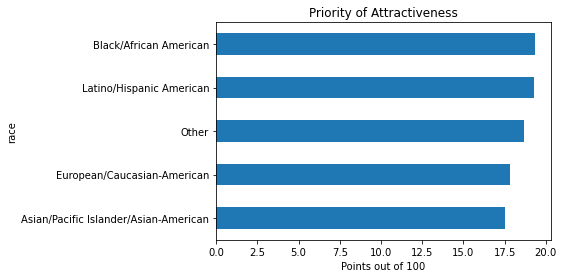

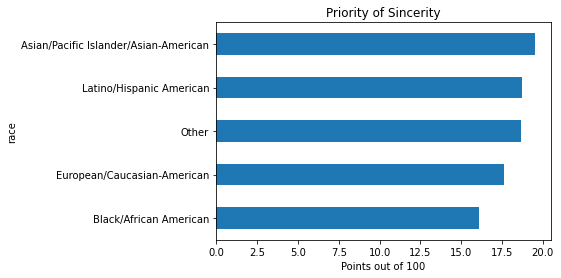

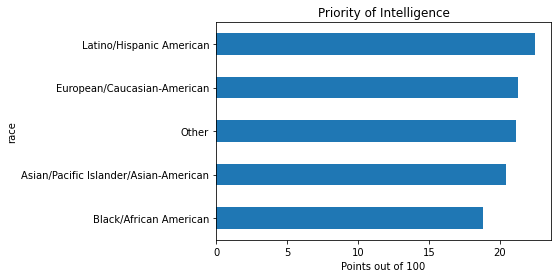

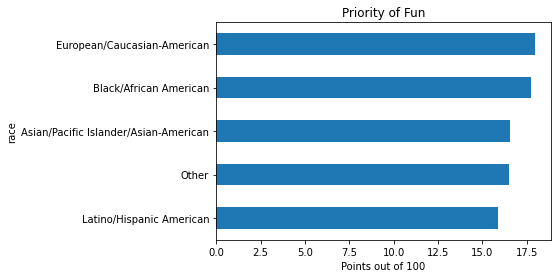

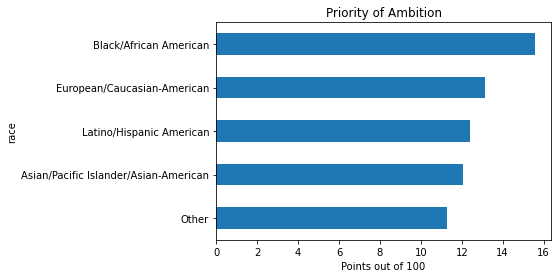

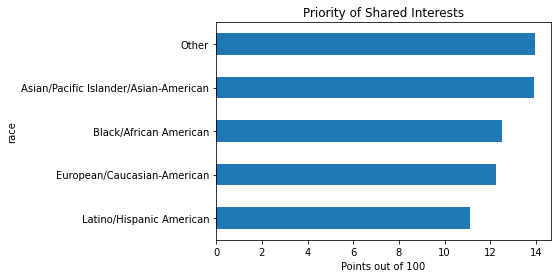

In [50]:
wfm1.sort_values(['attr1_1'], ascending = True).plot(kind = 'barh', y = "attr1_1", stacked = True, title = "Priority of Attractiveness", legend = None).set_xlabel('Points out of 100')
wfm1.sort_values(['sinc1_1'], ascending = True).plot(kind = 'barh', y = "sinc1_1", stacked = True, title = "Priority of Sincerity", legend = None).set_xlabel('Points out of 100')
wfm1.sort_values(['intel1_1'], ascending = True).plot(kind = 'barh', y = "intel1_1", stacked = True, title = "Priority of Intelligence", legend = None).set_xlabel('Points out of 100')
wfm1.sort_values(['fun1_1'], ascending = True).plot(kind = 'barh', y = "fun1_1", stacked = True, title = "Priority of Fun", legend = None).set_xlabel('Points out of 100')
wfm1.sort_values(['amb1_1'], ascending = True).plot(kind = 'barh', y = "amb1_1", stacked = True, title = "Priority of Ambition", legend = None).set_xlabel('Points out of 100')
wfm1.sort_values(['shar1_1'], ascending = True).plot(kind = 'barh', y = "shar1_1", stacked = True, title = "Priority of Shared Interests", legend = None).set_xlabel('Points out of 100')


In [39]:
males_ = data[data['gender'] == 1]
mfm = males_.drop_duplicates('iid').groupby('race')['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg('mean')
mfm1 = mfm.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
mfm1

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
race,,,,,,
Black/African American,25.700000,17.800000,20.500000,17.000000,8.200000,9.900000
European/Caucasian-American,28.369074,15.173951,20.189815,18.087654,8.193168,10.285901
Latino/Hispanic American,25.125882,17.027647,20.331765,16.155294,10.951176,13.233529
Asian/Pacific Islander/Asian-American,25.708615,18.650781,16.785538,16.349375,9.923437,13.137031
Other,25.353810,17.432857,19.909048,19.210952,9.217619,8.399524


Text(0.5, 0, 'Points out of 100')

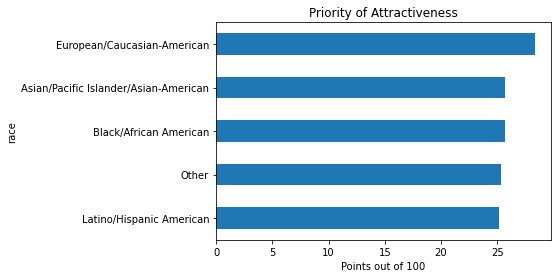

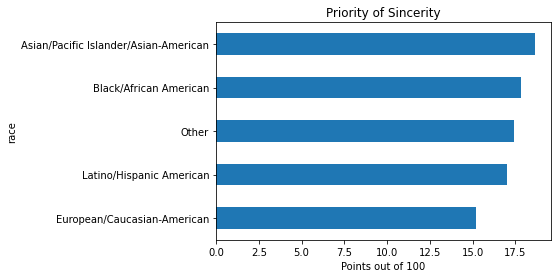

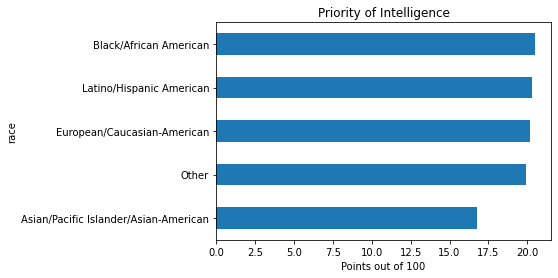

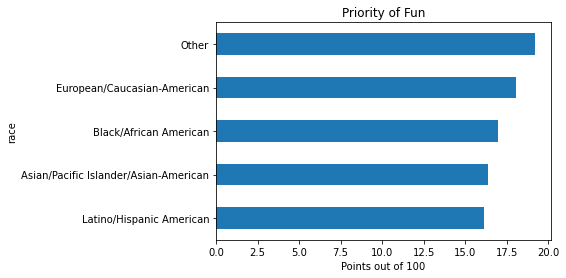

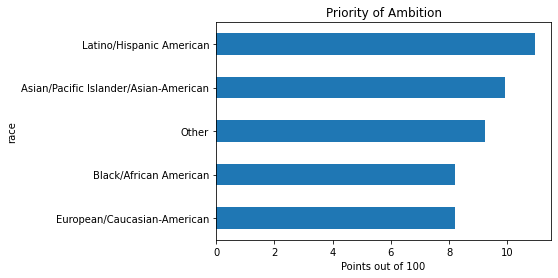

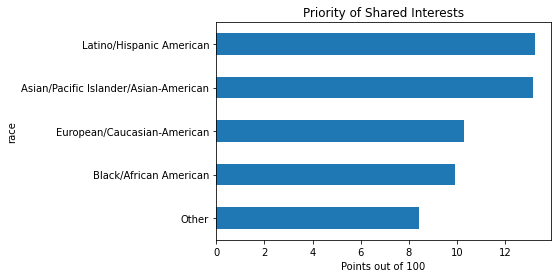

In [42]:
mfm1.sort_values(['attr1_1'], ascending = True).plot(kind = 'barh', y = "attr1_1", stacked = True, title = "Priority of Attractiveness", legend = None).set_xlabel('Points out of 100')
mfm1.sort_values(['sinc1_1',], ascending = True).plot(kind = 'barh', y = "sinc1_1", stacked = True, title = "Priority of Sincerity", legend = None).set_xlabel('Points out of 100')
mfm1.sort_values(['intel1_1'], ascending = True).plot(kind = 'barh', y = "intel1_1", stacked = True, title = "Priority of Intelligence", legend = None).set_xlabel('Points out of 100')
mfm1.sort_values(['fun1_1'], ascending = True).plot(kind = 'barh', y = "fun1_1", stacked = True, title = "Priority of Fun", legend = None).set_xlabel('Points out of 100')
mfm1.sort_values(['amb1_1'], ascending = True).plot(kind = 'barh', y = "amb1_1", stacked = True, title = "Priority of Ambition", legend = None).set_xlabel('Points out of 100')
mfm1.sort_values(['shar1_1'], ascending = True).plot(kind = 'barh', y = "shar1_1", stacked = True, title = "Priority of Shared Interests", legend = None).set_xlabel('Points out of 100')


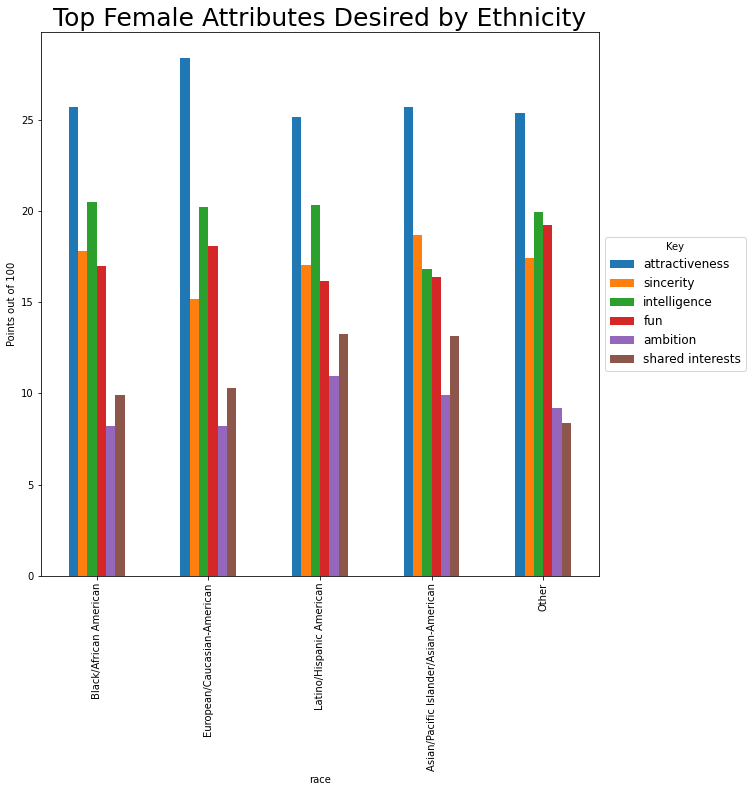

In [54]:
#stacking my dataframe nicely to give me just the mean of each attribute
idx = pd.IndexSlice
mean_m = mfm1
mean_m.stack()

#plot
m = mean_m.plot(kind='bar', figsize = (10,10))
m.set_title(label = 'Top Female Attributes Desired by Ethnicity',fontdict ={'fontsize':25})
m.set_ylabel('Points out of 100')
plt.legend(['attractiveness','sincerity','intelligence','fun','ambition','shared interests'],loc = 'center left', bbox_to_anchor=(1.0, 0.5), fontsize = 'large' , title = 'Key')
#plt.savefig('Desired Attributes for Men.png')
plt.show()

In [23]:
mean_m.stack()

,,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
race,,,,,,,
Black/African American,mean,25.700000,17.800000,20.500000,17.000000,8.200000,9.900000
European/Caucasian-American,mean,28.369074,15.173951,20.189815,18.087654,8.193168,10.285901
Latino/Hispanic American,mean,25.125882,17.027647,20.331765,16.155294,10.951176,13.233529
Asian/Pacific Islander/Asian-American,mean,25.708615,18.650781,16.785538,16.349375,9.923437,13.137031
Other,mean,25.353810,17.432857,19.909048,19.210952,9.217619,8.399524


In [13]:
market = ['attr5_1','intel5_1','sinc5_1','fun5_1','amb5_1']
self = ['attr3_1','intel3_1','sinc3_1','fun3_1','amb3_1']
scores = data[['iid','gender','race','age','income','attr3_1','intel3_1','sinc3_1','fun3_1','amb3_1','attr5_1','intel5_1','sinc5_1','fun5_1','amb5_1']].copy().fillna(0)
scores['Total Market Rating'] = scores[market].sum(axis=1)
scores['Total Self Rating'] = scores[self].sum(axis=1)
grouped = scores.groupby('iid').agg('max')
grouped

,gender,race,age,income,attr3_1,intel3_1,sinc3_1,fun3_1,amb3_1,attr5_1,intel5_1,sinc5_1,fun5_1,amb5_1,Total Market Rating,Total Self Rating
iid,,,,,,,,,,,,,,,,
1,0,4.0,21.0,69487.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2,0,2.0,24.0,65929.0,7.0,8.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
3,0,2.0,25.0,0.0,8.0,9.0,9.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
4,0,2.0,23.0,37754.0,7.0,7.0,8.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
5,0,2.0,21.0,86340.0,6.0,10.0,3.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,1,2.0,30.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,50.0,50.0
549,1,2.0,28.0,0.0,7.0,9.0,10.0,8.0,9.0,7.0,10.0,10.0,7.0,7.0,41.0,43.0
550,1,2.0,30.0,0.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,35.0,35.0


In [14]:
'''How do you think you measure up?
Please rate your opinion of your own attributes, on a scale of 1-10 (be honest!):
attr3_1 
Attractive
sinc3_1
Sincere
int3_1
Intelligent
fun3_1
Fun
amb3_1
Ambitious'''

corr_market = grouped.corr().filter(market).drop(market)
corr_self = grouped.corr().filter(self).drop(self)

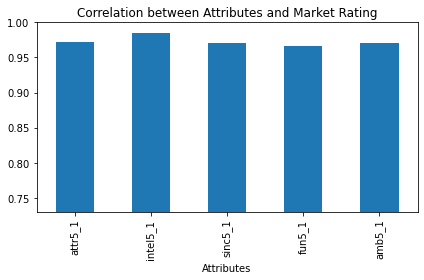

In [61]:
plt.ylim(.73,1)
corr_market.loc['Total Market Rating'].plot(kind = 'bar',title = "Correlation between Attributes and Market Rating").set_xlabel('Attributes')
plt.tight_layout()
#plt.savefig('Corr_Market.png')

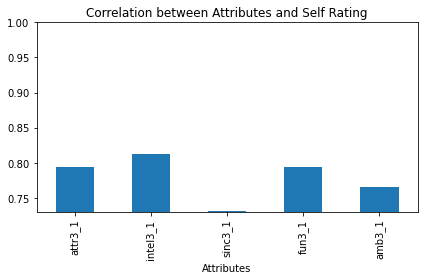

In [60]:
plt.ylim(.73,1)
corr_self.loc['Total Self Rating'].plot(kind = 'bar', title = "Correlation between Attributes and Self Rating").set_xlabel('Attributes')
plt.tight_layout()
#plt.savefig('Corr_Self.png')

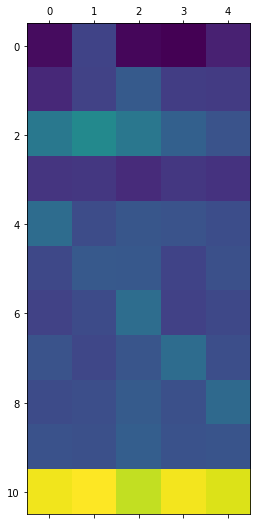

In [52]:
plt.matshow(corr_self)
plt.show()
